<a href="https://colab.research.google.com/github/vneumannufprbr/PracticasTensorflow/blob/main/PredicSTLSTMSolarEspaOkGit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las modificaciones principales para cambiar de la arquitectura GRU a LSTM y enfocarse solo en la variable 'generation solar' son las siguientes:

Importación de la capa LSTM: Se cambió la importación de GRU a LSTM en las librerías de TensorFlow/Keras.
Definición de la variable objetivo: Se modificó la lista targets para que contenga únicamente "generation solar". Esto asegura que el bucle principal solo procese esta variable.
Arquitectura del modelo: En ambas secciones donde se define el modelo (model_eval y model_final), la capa GRU fue reemplazada por la capa LSTM con los mismos parámetros (128 unidades y activación 'relu').
Visualización de resultados: La sección de visualización ahora crea un DataFrame forecast_df que solo incluye las columnas 'time' y 'solar', y el gráfico se genera únicamente para el pronóstico de generación solar. Los títulos y etiquetas de los gráficos también se actualizaron para reflejar que se trata de la "Generación Solar con Redes Neuronales Recurrentes (LSTM)".
En resumen, los cambios se centraron en reemplazar la capa específica de la red neuronal recurrente (de GRU a LSTM) y en ajustar el código para procesar y visualizar solo la variable de interés ('generation solar').


podria indicar los bloques de código?
¡Por supuesto! Las modificaciones se realizaron principalmente en los siguientes bloques de código dentro de la celda:

Importación de librerías: Se cambió la importación de la capa:
from tensorflow.keras.layers import Dense, Input, LSTM # Cambiar GRU por LSTM
Selección de variable objetivo: Aquí se define la lista de variables a procesar, que ahora solo incluye 'generation solar':
# Seleccionar variable objetivo única (Generación Solar)
targets = ["generation solar"]
Construcción y entrenamiento del modelo de evaluación (model_eval): Se reemplazó la capa GRU por LSTM:
model_eval = Sequential([
    Input(shape=(WINDOW_SIZE, 1)),  # Capa de entrada para LSTM
    LSTM(128, activation='relu'), # Capa LSTM con 128 unidades
    Dense(32, activation='relu'), # Segunda capa oculta
    Dense(16, activation='relu'), # Tercera capa oculta
    Dense(1)                      # Capa de salida lineal
])
Construcción y entrenamiento del modelo final (model_final): De manera similar, se reemplazó la capa GRU por LSTM:
model_final = Sequential([
    Input(shape=(WINDOW_SIZE, 1)), # Capa de entrada para LSTM
    LSTM(128, activation='relu'), # Capa LSTM con 128 unidades
    Dense(32, activation='relu'), # Segunda capa oculta
    Dense(16, activation='relu'), # Tercera capa oculta
    Dense(1)                      # Capa de salida lineal
])
Visualización de resultados: Esta sección fue modificada para crear un DataFrame y un gráfico específicos para el pronóstico de 'generation solar':
# Crear DataFrame con los pronósticos para 'generation solar'
last_date = data['time'].iloc[-1]
future_dates = pd.to_datetime([last_date + pd.DateOffset(hours=i) for i in range(1, FORECAST_HORIZON + 1)])

forecast_df = pd.DataFrame({
    'time': future_dates,
    'solar': results['generation solar']
})

# Graficar los pronósticos (solo para Generación Solar)
plt.figure(figsize=(10, 6)) # Ajustar tamaño de la figura
plt.suptitle('Pronóstico a 24 Horas de Generación Solar con Redes Neuronales Recurrentes (LSTM) (Keras)', fontsize=16, y=0.98) # Actualizar título y posición

# Gráfico para Generación Solar
plt.plot(forecast_df['time'], forecast_df['solar'], label='Pronóstico Solar', color='orange', marker='.')
plt.title('Generación Solar')
plt.xlabel('Fecha y Hora') # Añadir etiqueta al eje X
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True) # Añadir cuadrícula

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajustar layout para el título
plt.show()



Procesando variable: generation solar

Entrenando LSTM para evaluación...
Entrenamiento completado.


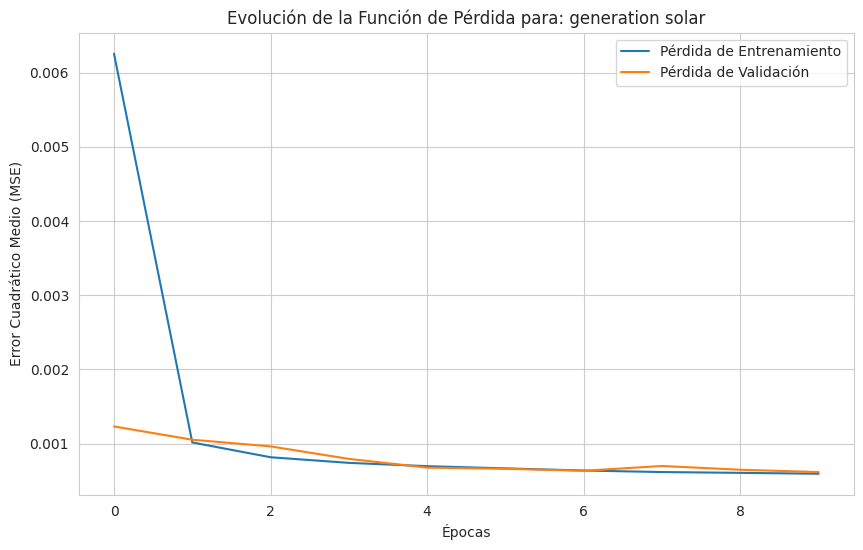


Métricas de Evaluación en Conjunto de Prueba para 'generation solar':
  R^2: 0.9321
  MSE: 156120.5356
  RMSE: 395.1209
  MAE: 234.2132

Re-entrenando LSTM con datos completos para pronóstico futuro...
Epoch 1/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 35s 30ms/step - loss: 0.0230
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - loss: 0.0011
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - loss: 8.1005e-04
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - loss: 7.4080e-04
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - loss: 7.0009e-04
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 6.6952e-04
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - loss: 6.5198e-04
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - loss: 6.3877e-04
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 6.2143e-04
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - loss: 6.0592e-04
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/st

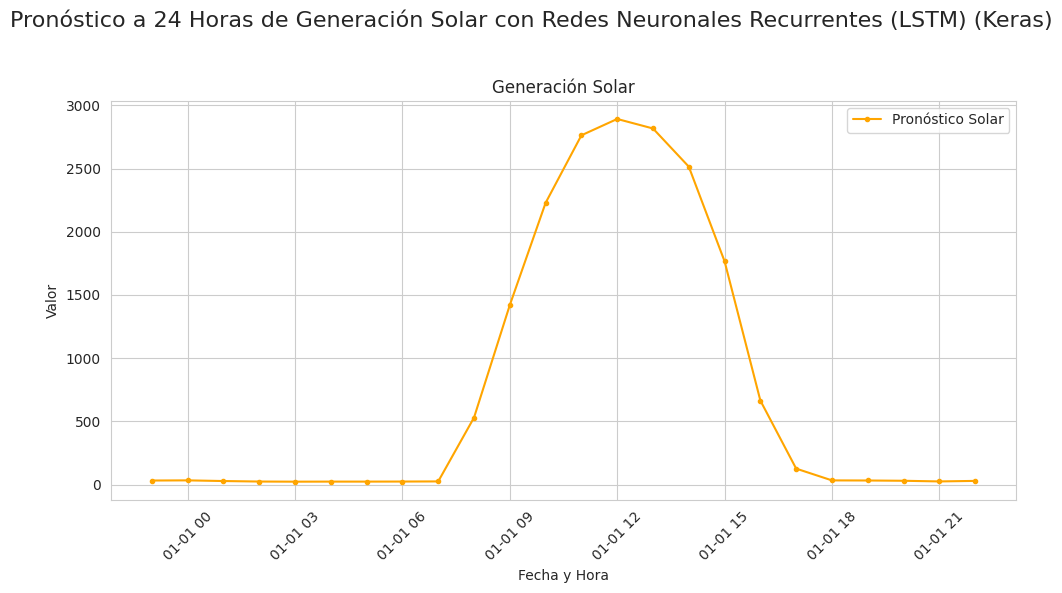

In [2]:
# -*- coding: utf-8 -*-
"""
Regresión de Series Temporales con TensorFlow/Keras.

Este script es para pronosticar series temporales
de generación de energía (solar, eólica) y demanda total usando redes neuronales.
"""

# --- 1. INSTALACIÓN Y CARGA DE LIBRERÍAS ---
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM # Cambiar GRU por LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

import random as python_random

# Fijar semillas para reproducibilidad
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# --- 2. LECTURA Y PREPARACIÓN DE DATOS ---

# Leer y preparar los datos desde la URL
#url = "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/energy_dataset.csv" # Dataset con 3.500 instancias
#data = pd.read_csv(url) # Dataset con 3.500 instancias

url =  "https://raw.githubusercontent.com/vneumannufprbr/Series-Temporales/main/energy_dataset.csv" # Dataset con 35.000 instancias
data = pd.read_csv(url) # Dataset con 35.000 instancias # dtype=dtype_dict,

# Convertir la columna 'time' a formato datetime y ordenar
data['time'] = pd.to_datetime(data['time'], utc=True)
data = data.sort_values('time')

# --- 3. DEFINICIÓN DE PARÁMETROS Y FUNCIONES AUXILIARES ---

# Seleccionar variable objetivo única (Generación Solar)
targets = ["generation solar"]
# Cambiar nombres con puntos por espacios para facilitar el acceso en pandas
data.columns = [col.replace('.', ' ') for col in data.columns]

# Diccionarios para almacenar resultados
results = {}
metrics = {}
histories = {} # Para guardar el historial de entrenamiento

# Parámetros del modelo
WINDOW_SIZE = 24       # Ventana de 24 horas
TEST_SIZE = 24         # 24 horas para prueba
FORECAST_HORIZON = 24  # Horizonte de 24 horas para pronóstico futuro

def create_features(series, window_size):
    """
    Crea un dataset de características (X) y objetivo (y) a partir de una serie temporal.
    """
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:(i + window_size)])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

def calculate_metrics(actual, predicted):
    """
    Calcula e imprime las métricas de evaluación R2, RMSE, MSE y MAE.
    """
    r2 = r2_score(actual, predicted)
    mse = mean_squared_error(actual, predicted) # Calcular MSE
    rmse = np.sqrt(mse) # RMSE es la raíz cuadrada del MSE
    mae = mean_absolute_error(actual, predicted)

    print(f"  R^2: {r2:.4f}")
    print(f"  MSE: {mse:.4f}") # Imprimir MSE
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")


    return {"R2": r2, "MSE": mse, "RMSE": rmse, "MAE": mae} # Incluir MSE en el diccionario

def plot_loss_evolution(history, target_var):
    """
    Grafica la evolución de la pérdida de entrenamiento y validación.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento') # Translated label
    plt.plot(history.history['val_loss'], label='Pérdida de Validación') # Translated label
    plt.title(f'Evolución de la Función de Pérdida para: {target_var}')
    plt.xlabel('Épocas') # Translated label
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.legend()
    plt.show()

# --- 4. ENTRENAMIENTO, EVALUACIÓN Y PRONÓSTICO CON KERAS ---

# Bucle para cada variable objetivo (ahora solo 'generation solar')
for target_var in targets:
    print(f"\n{'='*50}")
    print(f"Procesando variable: {target_var}")
    print(f"{'='*50}")

    # Extraer la serie completa y eliminar valores nulos
    series_full = data[target_var].dropna().to_numpy()

    # 1. DIVISIÓN EN ENTRENAMIENTO Y PRUEBA
    train_series = series_full[:-TEST_SIZE]
    test_series_actual = series_full[-TEST_SIZE:]

    # Crear características para el conjunto de entrenamiento
    X_train, y_train = create_features(train_series, WINDOW_SIZE)
    y_train = y_train.reshape(-1, 1) # Asegurar que y_train tenga 2 dimensiones

    # Escalar datos de entrenamiento a [0, 1]
    # Se usa un scaler para las características (X) y otro para el objetivo (y)
    scaler_X = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)

    scaler_y = MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train)

    # Las LSTMs esperan una entrada 3D (muestras, pasos de tiempo, características)
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))


    # 2. CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO DE EVALUACIÓN
    print("\nEntrenando LSTM para evaluación...")

    model_eval = Sequential([
        Input(shape=(WINDOW_SIZE, 1)),  # Capa de entrada para LSTM
        LSTM(128, activation='relu'), # Capa LSTM con 128 unidades
        Dense(32, activation='relu'), # Segunda capa oculta
        Dense(16, activation='relu'), # Tercera capa oculta
        Dense(1)                      # Capa de salida lineal
    ])

    model_eval.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo y guardar el historial para graficar la pérdida
    history = model_eval.fit(
        X_train_scaled,
        y_train_scaled,
        epochs=10, # epochs=50
        validation_split=0.2, # Usa el 20% de los datos para validación
        batch_size=32,
        verbose=0 # 0 para no mostrar el log de cada época
    )


    histories[target_var] = history
    print("Entrenamiento completado.")

    # Graficar evolución de la pérdida
    plot_loss_evolution(history, target_var)

    # 3. PREDICCIÓN RECURSIVA EN EL CONJUNTO DE PRUEBA
    test_predictions = []
    current_window = train_series[-WINDOW_SIZE:].tolist()

    for _ in range(TEST_SIZE):
        # Escalar la ventana actual y darle la forma 3D
        window_scaled = scaler_X.transform(np.array(current_window).reshape(1, -1))
        window_scaled = window_scaled.reshape((window_scaled.shape[0], window_scaled.shape[1], 1))


        # Predecir el siguiente valor
        pred_scaled = model_eval.predict(window_scaled, verbose=0)

        # Des-escalar la predicción
        pred_actual = scaler_y.inverse_transform(pred_scaled)[0, 0]

        # Guardar la predicción
        test_predictions.append(pred_actual)

        # Actualizar la ventana: eliminar el primer valor y añadir la nueva predicción
        current_window.pop(0)
        current_window.append(pred_actual)

    # Calcular y mostrar métricas de evaluación
    print(f"\nMétricas de Evaluación en Conjunto de Prueba para '{target_var}':")
    metrics[target_var] = calculate_metrics(test_series_actual, test_predictions)

    # 4. PRONÓSTICO FUTURO USANDO TODO EL DATASET
    print("\nRe-entrenando LSTM con datos completos para pronóstico futuro...")

    # Preparar datos completos
    X_full, y_full = create_features(series_full, WINDOW_SIZE)
    y_full = y_full.reshape(-1, 1)

    scaler_X_full = MinMaxScaler()
    X_full_scaled = scaler_X_full.fit_transform(X_full)

    scaler_y_full = MinMaxScaler()
    y_full_scaled = scaler_y_full.fit_transform(y_full)

    # Dar forma 3D a los datos completos para la LSTM
    X_full_scaled = X_full_scaled.reshape((X_full_scaled.shape[0], X_full_scaled.shape[1], 1))


    # Construir y entrenar el modelo final
    model_final = Sequential([
        Input(shape=(WINDOW_SIZE, 1)), # Capa de entrada para LSTM
        LSTM(128, activation='relu'), # Capa LSTM con 128 unidades
        Dense(32, activation='relu'), # Segunda capa oculta
        Dense(16, activation='relu'), # Tercera capa oculta
        Dense(1)                      # Capa de salida lineal
    ])
    model_final.compile(optimizer='adam', loss='mean_squared_error')
    model_final.fit(X_full_scaled, y_full_scaled, epochs=50, batch_size=32, verbose=1)

    print("Entrenamiento completado.")

    # Generar pronóstico futuro
    future_predictions = []
    last_window_full = series_full[-WINDOW_SIZE:].tolist()

    for _ in range(FORECAST_HORIZON):
        # Escalar la última ventana completa y darle forma 3D
        window_scaled = scaler_X_full.transform(np.array(last_window_full).reshape(1, -1))
        window_scaled = window_scaled.reshape((window_scaled.shape[0], window_scaled.shape[1], 1))

        pred_scaled = model_final.predict(window_scaled, verbose=0)
        pred_actual = scaler_y_full.inverse_transform(pred_scaled)[0, 0]
        future_predictions.append(pred_actual)
        last_window_full.pop(0)
        last_window_full.append(pred_actual)

    results[target_var] = future_predictions

# --- 5. VISUALIZACIÓN DE RESULTADOS ---

# Crear DataFrame con los pronósticos para 'generation solar'
last_date = data['time'].iloc[-1]
future_dates = pd.to_datetime([last_date + pd.DateOffset(hours=i) for i in range(1, FORECAST_HORIZON + 1)])

forecast_df = pd.DataFrame({
    'time': future_dates,
    'solar': results['generation solar']
})

# Graficar los pronósticos (solo para Generación Solar)
plt.figure(figsize=(10, 6)) # Ajustar tamaño de la figura
plt.suptitle('Pronóstico a 24 Horas de Generación Solar con Redes Neuronales Recurrentes (LSTM) (Keras)', fontsize=16, y=0.98) # Actualizar título y posición

# Gráfico para Generación Solar
plt.plot(forecast_df['time'], forecast_df['solar'], label='Pronóstico Solar', color='orange', marker='.')
plt.title('Generación Solar')
plt.xlabel('Fecha y Hora') # Añadir etiqueta al eje X
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True) # Añadir cuadrícula

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajustar layout para el título
plt.show()